In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Define grid size
GRID_SIZE = 3

# Allowed moves: Right, left, above and below
MOVES = [(0,1), (0,-1), (1,0), (-1,0)]

In [28]:
def is_valid_move(x, y, visited):
    # Check if the move is within the grid and not visited
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in visited 

def count_paths(x, y, visited):
    # Check if we have visited all cells
    if len(visited) == GRID_SIZE * GRID_SIZE:
        return 1  # Found a valid path

    total_paths = 0
    for dx, dy in MOVES:
        new_x, new_y = x + dx, y + dy
        if is_valid_move(new_x, new_y, visited):
            total_paths += count_paths(new_x, new_y, visited | {(new_x, new_y)})

    return total_paths

In [29]:
# Compute total paths starting from each square
total_paths = sum(count_paths(x, y, {(x, y)}) for x in range(GRID_SIZE) for y in range(GRID_SIZE))

# Print the result
print(f"Total number of valid paths in {GRID_SIZE}x{GRID_SIZE} grid:", total_paths)

Total number of valid paths in 3x3 grid: 40


Total number of valid paths in 2x2 grid: 8
Total number of valid paths in 3x3 grid: 40
Total number of valid paths in 4x4 grid: 552
Total number of valid paths in 5x5 grid: 8648


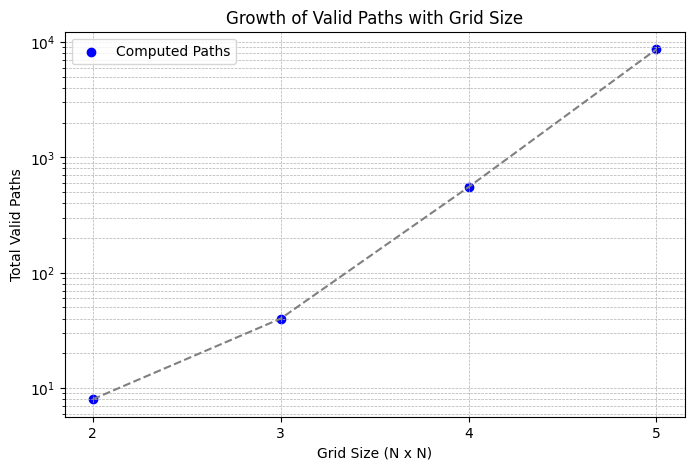

In [37]:
# Define grid sizes to compute
grid_sizes = [2, 3, 4, 5]  # Extend this list if needed
path_counts = []

# Compute total paths for each grid size
for GRID_SIZE in grid_sizes:
    total_paths = sum(count_paths(x, y, {(x, y)}) for x in range(GRID_SIZE) for y in range(GRID_SIZE))
    path_counts.append(total_paths)
    print(f"Total number of valid paths in {GRID_SIZE}x{GRID_SIZE} grid:", total_paths)

# Create a scatter plot of grid size vs. number of valid paths
plt.figure(figsize=(8, 5))
plt.scatter(grid_sizes, path_counts, color='blue', label="Computed Paths")
plt.plot(grid_sizes, path_counts, linestyle='dashed', color='gray')  # Optional connecting line

# Labels and title
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Total Valid Paths")
plt.title("Growth of Valid Paths with Grid Size")
plt.xticks(grid_sizes)
plt.yscale("log")  # Log scale if the numbers grow quickly
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()